# Lab 6 - LHC
## Problem 1

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

bkgd = stats.poisson.rvs(100, size =1000000)
print('Prob: ', stats.poisson.cdf(5, 100))

Prob:  3.261456366720447e-36


## Problem 2

Signal:  249.88947278080195


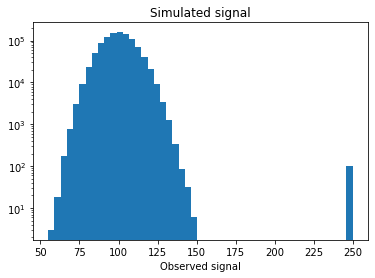

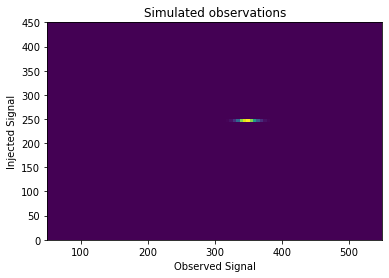

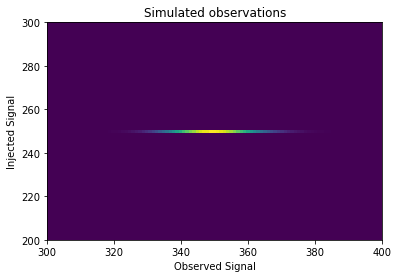

In [160]:
# Inject a signal

signal = 100 + 15 * np.std(bkgd)
print('Signal: ', signal)
sig_array11 = 100 * [100 + 15 * np.std(bkgd)]  # +15 std-dev signal, 100 points
data11 = np.append(bkgd, sig_array11)
plt.hist(data11, bins = 49)
plt.yscale('log')
plt.xlabel('Observed signal')
plt.title('Simulated signal')
plt.show()

sig_array12 = 1000000 * [100 + 15 * np.std(bkgd)]  # +15 std-dev signal
data12 = bkgd + sig_array
signaledges = np.linspace(0,450,100)
dataedges = np.linspace(50,550,100)
H1, temp1, temp2, temp3 = plt.hist2d(data12, sig_array12, bins=[dataedges,signaledges], density=True)
plt.title('Simulated observations')
plt.xlabel('Observed Signal')
plt.ylabel('Injected Signal')
plt.show()

se = np.linspace(200,300,100)
de = np.linspace(300,400,100)
plt.hist2d(data12, sig_array12, bins=[de,se], density=True)
plt.title('Simulated observations')
plt.xlabel('Observed Signal')
plt.ylabel('Injected Signal')
plt.show()

__A)__ The histogram appears to be Guassian with a mean of 100 plus several standard deviation signals. The observed signal does appear noticeable. The histogram indicates the probability of finding a true signal value in a range of observed signals.  

__B)__ The observed signal is biased because of its frequency and likely to be stronger than the true signal given the high sigma. The signal is symmetric as there is a even distribution of probabilities on either side of the mean.

## Problem 3

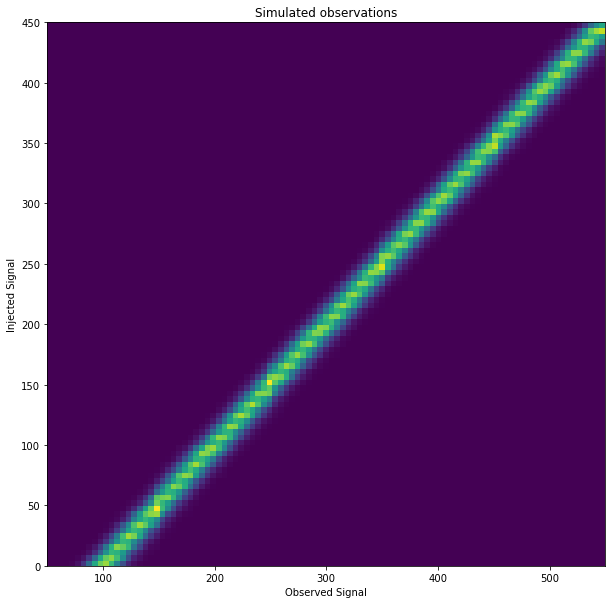

In [156]:
# Suite of signals

# A) ###########################################################
# Simulating the probability of measuring a true signal value given a range of observed signals.

signal2 = np.random.randint(0, 100 + 35 * np.std(bkgd), 1000000)
data2 = bkgd + signal2

signaledges2 = np.linspace(0,450,100)
dataedges2 = np.linspace(50,550,100)
datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2

plt.figure(figsize=(10,10))
H2, temp1, temp2, temp3 = plt.hist2d(data2, signal2, bins=[dataedges2,signaledges2], density=True)
plt.title('Simulated observations')
plt.xlabel('Observed Signal')
plt.ylabel('Injected Signal')
plt.show()

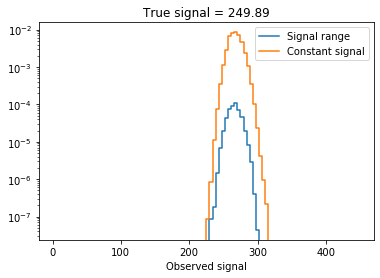

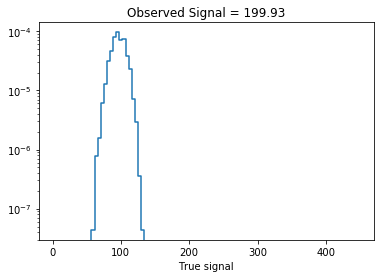

In [161]:
# B) ###########################################################

# Get index of bin that contains signal
n1 = 0
for i in range(len(signaledges)):
    if signal - signaledges[i] > 0:
        n1 = i

yslice = H2.T[n1]  # horizontal bin in which Problem 2 signal lies
plt.step(signalcenters2, yslice)
plt.step(signalcenters2, H1.T[n1])
plt.xlabel('Observed signal')
plt.yscale('log')
title1 = 'True signal = ' + str(round(signal, 2))
plt.title(title1)
plt.legend(['Signal range','Constant signal'])
plt.show()

# C) ###########################################################

observed = 100 + 10 * np.std(bkgd)

# Get index of bin that contains observed data
n2 = 0
for i in range(len(dataedges2)):
    if observed - dataedges2[i] > 0:
        n2 = i

xslice = H2[n2]  # vertical bin in which observed value lies
plt.step(signalcenters2, xslice)
plt.xlabel('True signal')
plt.yscale('log')
title2 = 'Observed Signal = ' + str(round(observed, 2))
plt.title(title2)
plt.show()

The overplotted P(observed|true) has the same mean and approximately the same standard deviation. The constant signal has a larger probability due to the recurrence of the same signal whereas the range of signals is less biased due to there being a spread of true signals. The histogram represents the probability of getting a true signal value within a range given the observed signal using Bayes' Theorem.

In [151]:
# D) ###########################################################
# 1-sigmσ uncertainty on the true signal strength

mean = np.average(signalcenters2, weights=xslice)
var = np.average((signalcenters2 - mean)**2, weights=xslice)
dev = np.sqrt(var)
print('Mean: ', mean, '\nStd Dev: ', dev)
print('Uncertainty: ', mean, '+-', dev)

Mean:  98.92547185542209 
Std Dev:  10.087617251834008
Uncertainty:  98.92547185542209 +- 10.087617251834008


The observed signal is symmetric but not biased because there is an even range of observed signals. This makes sense as given an observed signal, we get a reasonable range of true signal strengths that could result in the same observation. 